## Homework
> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 


In [1]:
%autosave 0

Autosave disabled


In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'
!wget $data -O course_lead_scoring.csv

--2025-10-20 19:49:42--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: 'course_lead_scoring.csv'

     0K .......... .......... .......... .......... .......... 63% 1,43M 0s
    50K .......... .......... ........                        100% 1,14M=0,06s

2025-10-20 19:49:42 (1,31 MB/s) - 'course_lead_scoring.csv' saved [80876/80876]



In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [5]:
df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [6]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [7]:
df.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score',
       'converted'],
      dtype='object')

In [8]:
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
categorical = ['lead_source', 'industry', 'employment_status', 'location']

print(df[numerical].isnull().sum())
print('---------------------------')
print(df[categorical].isnull().sum())

number_of_courses_viewed      0
annual_income               181
interaction_count             0
lead_score                    0
dtype: int64
---------------------------
lead_source          128
industry             134
employment_status    100
location              63
dtype: int64


In [9]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:10])
    print(df[col].nunique())
    print()

lead_source
['paid_ads' 'social_media' 'events' 'referral' 'organic_search' nan]
5

industry
[nan 'retail' 'healthcare' 'education' 'manufacturing' 'technology'
 'other' 'finance']
7

number_of_courses_viewed
[1 5 2 3 0 4 6 8 7 9]
10

annual_income
[79450. 46992. 78796. 83843. 85012. 59904. 51283. 62975. 38648. 59866.]
1267

employment_status
['unemployed' 'employed' nan 'self_employed' 'student']
4

location
['south_america' 'australia' 'europe' 'africa' 'middle_east' nan
 'north_america' 'asia']
7

interaction_count
[4 1 3 6 2 0 5 7 9 8]
12

lead_score
[0.94 0.8  0.69 0.87 0.62 0.83 0.57 0.86 0.43 0.92]
101

converted
[1 0]
2



In [11]:
df.shape, len(df)

((1462, 9), 1462)

In [12]:
for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [13]:
df['annual_income'] = df['annual_income'].fillna(0.0)
df[categorical] = df[categorical].fillna('NA')

In [14]:
#verify if NaN values are filled
print('---------------------------')
print(df.isnull().sum())
print('---------------------------')
print(df[numerical].isnull().sum())
print('---------------------------')
print(df[categorical].isnull().sum())

---------------------------
lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64
---------------------------
number_of_courses_viewed    0
annual_income               0
interaction_count           0
lead_score                  0
dtype: int64
---------------------------
lead_source          0
industry             0
employment_status    0
location             0
dtype: int64


In [15]:
df['converted'].isnull().sum()

np.int64(0)

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

print('Number of records in each dataset:')
print('---------------------------')
print('Training set:', len(df_train))
print('Validation set:', len(df_val))
print('Test set:', len(df_test))  
print('---------------------------')
print('Y train:', len(y_train))
print('Y val:', len(y_val)) 
print('Y test:' , len(y_test))
print('---------------------------')
print('Total Records DF:', len(df))
print('---------------------------')
print('df_train Shape:', df_train.shape)
print('df_val Shape: ', df_val.shape)
print('df_test Shape: ',df_test.shape)
print('y_train Shape:', y_train.shape)
print('y_val Shape: ', y_val.shape)
print('y_test Shape:', y_test.shape)

Number of records in each dataset:
---------------------------
Training set: 876
Validation set: 293
Test set: 293
---------------------------
Y train: 876
Y val: 293
Y test: 293
---------------------------
Total Records DF: 1462
---------------------------
df_train Shape: (876, 8)
df_val Shape:  (293, 8)
df_test Shape:  (293, 8)
y_train Shape: (876,)
y_val Shape:  (293,)
y_test Shape: (293,)


In [17]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
converted_decision = (y_pred >= 0.5)
(y_val == converted_decision).mean()

np.float64(0.8088737201365188)

Converted(>0.5) of 293

In [19]:
converted_decision.sum()

np.int64(181)

NOT Converted (<.50) of 293

In [20]:
293 - converted_decision.sum()

np.int64(112)

In [21]:
112/ 293

0.3822525597269625

In [22]:
181/293

0.6177474402730375

In [23]:
len(y_val)

293

In [24]:
(y_val == converted_decision).sum()

np.int64(237)

In [25]:
(y_val == converted_decision).mean()

np.float64(0.8088737201365188)

so 80% of users were converted and 20% were NOT converted

In [26]:
237/ 293

0.8088737201365188

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_val, y_pred >= 0.5)

0.8088737201365188

In [29]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.584
0.05 0.635
0.10 0.679
0.15 0.703
0.20 0.717
0.25 0.747
0.30 0.765
0.35 0.785
0.40 0.795
0.45 0.802
0.50 0.809
0.55 0.829
0.60 0.826
0.65 0.809
0.70 0.799
0.75 0.788
0.80 0.761
0.85 0.717
0.90 0.686
0.95 0.635
1.00 0.416


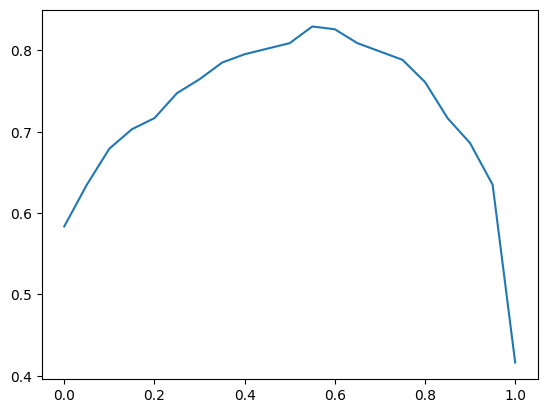

In [30]:
plt.plot(thresholds, scores)

In [31]:
from collections import Counter

for y_pred we have 293 users who seem CONVERTED

In [32]:
Counter(y_pred >= 1.0)

Counter({np.False_: 293})

The y_val distribution shows 171 converted(1) and 122 NOT converted(0)  users

In [33]:
Counter(y_val)

Counter({np.int64(1): 171, np.int64(0): 122})

means that 58% were converted

In [34]:
171/293

0.5836177474402731

so almost 42% did NOT converted

In [35]:
122/293

0.41638225255972694

Verifying with mean()

In [36]:
y_val.mean()

np.float64(0.5836177474402731)

It is exactly the last value on the graph when the threshold is 1:
- 1.00 --> 0.416

In [37]:
1 - y_val.mean()

np.float64(0.41638225255972694)

So we have a difference of NOT CONVERTED users between y_pred, with 20%, against the y_val (Accuracy),with 42%

confusion table

In [38]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [39]:
t=0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [40]:
actual_negative.mean(), actual_positive.mean()

(np.float64(0.41638225255972694), np.float64(0.5836177474402731))

In [41]:
predict_negative.mean(), predict_positive.mean()

(np.float64(0.3822525597269625), np.float64(0.6177474402730375))

In [42]:
predict_positive.sum() + predict_negative.sum()

np.int64(293)

In [43]:
predict_positive.sum(), predict_negative.sum()

(np.int64(181), np.int64(112))

In [44]:
actual_negative.sum(), actual_positive.sum()

(np.int64(122), np.int64(171))

In [45]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
tp, tn, fp, fn

(np.int64(148), np.int64(89), np.int64(33), np.int64(23))

In [46]:
confusion_matrix = np.array([
    [tn, fp], 
    [fn, tp]
    ])
confusion_matrix

array([[ 89,  33],
       [ 23, 148]])

normalizing

In [47]:
((confusion_matrix / confusion_matrix.sum()).round(3))*100

array([[30.4, 11.3],
       [ 7.8, 50.5]])

precision and recall

getting accuracy

In [48]:
(tp+tn)/(tp+tn+fp+fn)

np.float64(0.8088737201365188)

interesting on not converted (TruePositive + FalsePositive --> total of positive prediction)

In [49]:
#Precision
p = tp / (tp + fp)
print(f'{tp} / {tp+fp}')
print(p)

148 / 181
0.8176795580110497


In [50]:
print(f'True Positives: {tp}')
print(f'Total Positive: {148/181}')

print(f'False Positives: {fp}')
print(f'False Negatives: {33/181}')

True Positives: 148
Total Positive: 0.8176795580110497
False Positives: 33
False Negatives: 0.18232044198895028


- PRECISSION --> 81.7 %
-   100% -->  181 total converted and not
-   81.7% --> 148 converted
-   18.3% --> 33 not converted

RECALL
look at fraction of correctly identified - positive examples.

In [51]:
r = tp / (tp + fn)
print(f'{tp} / {tp+fn}')
print(r)

148 / 171
0.8654970760233918


In [52]:
print(f'True Positives: {tp}')
print(f'Correctly Positives: {148/171}')

print(f'False Negatives: {fn}')
print(f'False Negatives: {23/171}')

True Positives: 148
Correctly Positives: 0.8654970760233918
False Negatives: 23
False Negatives: 0.13450292397660818


- RECALL --> 81.7 %
-   100% -->  171 correctly True Positives + False Negatives
-   86.5% --> 148 converted
-   13.5% --> 23 not converted

ROC CURVES

TPR (True Positive Rate) and FPR (False Positive Rate)

In [53]:
# TPR (True Positive Rate)
tpr = tp / (tp + fn)
print(f'True Positive Rate: {tpr}')
print(f'{tp} / {tp+fn}')

True Positive Rate: 0.8654970760233918
148 / 171


In [54]:
# FPR (False Positive Rate)
fpr = fp / (fp + tn)
print(f'False Positive Rate: {fpr}')
print(f'{fp} / {fp+tn}')

False Positive Rate: 0.27049180327868855
33 / 122


roc for all threshols

In [55]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [56]:
scores

[(np.float64(0.0), np.int64(171), np.int64(122), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(171), np.int64(119), np.int64(0), np.int64(3)),
 (np.float64(0.02), np.int64(171), np.int64(114), np.int64(0), np.int64(8)),
 (np.float64(0.03), np.int64(171), np.int64(113), np.int64(0), np.int64(9)),
 (np.float64(0.04), np.int64(171), np.int64(109), np.int64(0), np.int64(13)),
 (np.float64(0.05), np.int64(171), np.int64(107), np.int64(0), np.int64(15)),
 (np.float64(0.06), np.int64(170), np.int64(103), np.int64(1), np.int64(19)),
 (np.float64(0.07), np.int64(170), np.int64(100), np.int64(1), np.int64(22)),
 (np.float64(0.08), np.int64(170), np.int64(96), np.int64(1), np.int64(26)),
 (np.float64(0.09), np.int64(170), np.int64(95), np.int64(1), np.int64(27)),
 (np.float64(0.1), np.int64(169), np.int64(92), np.int64(2), np.int64(30)),
 (np.float64(0.11), np.int64(168), np.int64(91), np.int64(3), np.int64(31)),
 (np.float64(0.12), np.int64(168), np.int64(86), np.int64(3), np.int64(36)

In [57]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)   
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,171,122,0,0
10,0.1,169,92,2,30
20,0.2,164,76,7,46
30,0.3,161,59,10,63
40,0.4,153,42,18,80
50,0.5,148,33,23,89
60,0.6,143,23,28,99
70,0.7,125,13,46,109
80,0.8,110,9,61,113
90,0.9,85,6,86,116


In [58]:
df_scores['tpr'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
df_scores['fpr'] = df_scores['fp'] / (df_scores['fp'] + df_scores['tn'])
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,171,122,0,0,1.000000,1.000000
10,0.1,169,92,2,30,0.988304,0.754098
20,0.2,164,76,7,46,0.959064,0.622951
30,0.3,161,59,10,63,0.941520,0.483607
40,0.4,153,42,18,80,0.894737,0.344262
50,0.5,148,33,23,89,0.865497,0.270492
60,0.6,143,23,28,99,0.836257,0.188525
70,0.7,125,13,46,109,0.730994,0.106557
80,0.8,110,9,61,113,0.643275,0.073770
90,0.9,85,6,86,116,0.497076,0.049180


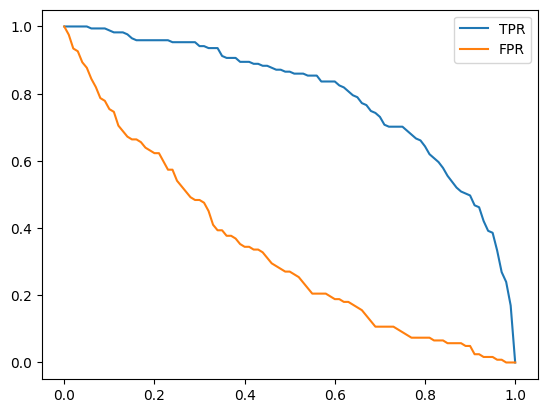

In [59]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

Random Model    

In [60]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , 0.302, 0.147, 0.092, 0.186, 0.346, 0.397,
       0.539, 0.419, 0.685, 0.204, 0.878, 0.027, 0.67 , 0.417, 0.559,
       0.14 , 0.198, 0.801, 0.968, 0.313, 0.692, 0.876, 0.895, 0.085,
       0.039, 0.17 , 0.878, 0.098, 0.421, 0.958, 0.533, 0.692, 0.316,
       0.687, 0.835, 0.018, 0.75 , 0.989, 0.748, 0.28 , 0.789, 0.103,
       0.448, 0.909, 0.294, 0.288, 0.13 , 0.019, 0.679, 0.212, 0.266,
       0.492, 0.053, 0.574, 0.147, 0.589, 0.7  , 0.102, 0.414, 0.694,
       0.414, 0.05 , 0.536, 0.664, 0.515, 0.945, 0.587, 0.903, 0.137,
       0.139, 0.807, 0.398, 0.165, 0.928, 0.348, 0.751, 0.726, 0.883,
       0.624, 0.751, 0.349, 0.27 , 0.896, 0.428, 0.965, 0.663, 0.622,
       0.115, 0.949, 0.45 , 0.578, 0.408, 0.237, 0.903, 0.574, 0.003,
       0.617, 0.327, 0.527, 0.886, 0.357, 0.909, 0.623, 0.016, 0.929,
       0.691, 0.997, 0.172, 0.137, 0.933, 0.697, 0.066, 0.755, 0.754,
       0.923, 0.712, 0.124, 0.02 , 0.026, 0.028, 0.246, 0.86 , 0.539,
       0.553, 0.842,

Accuracy of Random Model

In [61]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.48464163822525597)

In [62]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
    df_scores['fpr'] = df_scores['fp'] / (df_scores['fp'] + df_scores['tn'])

    return df_scores

In [63]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,171,122,0,0,1.000000,1.000000
10,0.1,153,108,18,14,0.894737,0.885246
20,0.2,135,96,36,26,0.789474,0.786885
30,0.3,120,87,51,35,0.701754,0.713115
40,0.4,105,78,66,44,0.614035,0.639344
50,0.5,90,70,81,52,0.526316,0.573770
60,0.6,68,55,103,67,0.397661,0.450820
70,0.7,47,43,124,79,0.274854,0.352459
80,0.8,36,30,135,92,0.210526,0.245902
90,0.9,18,18,153,104,0.105263,0.147541


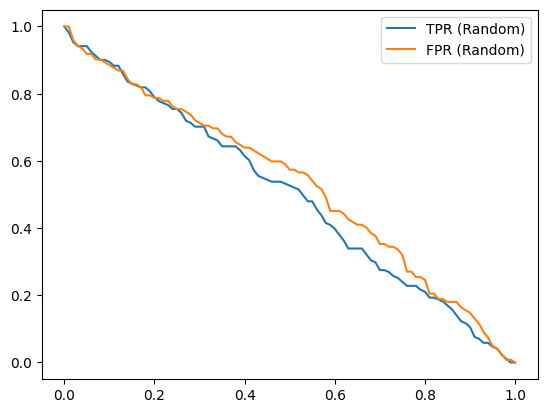

In [64]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR (Random)')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR (Random)')
plt.legend()

Ideal Model

In [65]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos



(np.int64(122), np.int64(171))

In [66]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [67]:
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred

array([0.        , 0.00342466, 0.00684932, 0.01027397, 0.01369863,
       0.01712329, 0.02054795, 0.0239726 , 0.02739726, 0.03082192,
       0.03424658, 0.03767123, 0.04109589, 0.04452055, 0.04794521,
       0.05136986, 0.05479452, 0.05821918, 0.06164384, 0.06506849,
       0.06849315, 0.07191781, 0.07534247, 0.07876712, 0.08219178,
       0.08561644, 0.0890411 , 0.09246575, 0.09589041, 0.09931507,
       0.10273973, 0.10616438, 0.10958904, 0.1130137 , 0.11643836,
       0.11986301, 0.12328767, 0.12671233, 0.13013699, 0.13356164,
       0.1369863 , 0.14041096, 0.14383562, 0.14726027, 0.15068493,
       0.15410959, 0.15753425, 0.1609589 , 0.16438356, 0.16780822,
       0.17123288, 0.17465753, 0.17808219, 0.18150685, 0.18493151,
       0.18835616, 0.19178082, 0.19520548, 0.19863014, 0.20205479,
       0.20547945, 0.20890411, 0.21232877, 0.21575342, 0.21917808,
       0.22260274, 0.2260274 , 0.22945205, 0.23287671, 0.23630137,
       0.23972603, 0.24315068, 0.24657534, 0.25      , 0.25342

In [68]:
1 - y_val.mean()

np.float64(0.41638225255972694)

In [69]:
((y_ideal_pred >= 0.416) == y_ideal).mean()

np.float64(1.0)

In [70]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,171,122,0,0,1.000000,1.000000
10,0.1,171,92,0,30,1.000000,0.754098
20,0.2,171,63,0,59,1.000000,0.516393
30,0.3,171,34,0,88,1.000000,0.278689
40,0.4,171,5,0,117,1.000000,0.040984
50,0.5,147,0,24,122,0.859649,0.000000
60,0.6,117,0,54,122,0.684211,0.000000
70,0.7,88,0,83,122,0.514620,0.000000
80,0.8,59,0,112,122,0.345029,0.000000
90,0.9,30,0,141,122,0.175439,0.000000


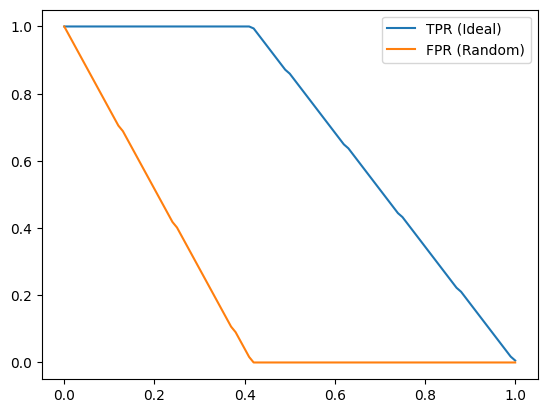

In [71]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR (Ideal)')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR (Random)')
plt.legend()

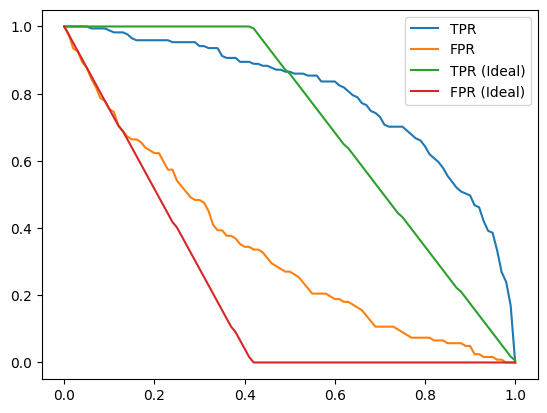

In [72]:

plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
#plt.legend()
#plt.legend()

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR (Ideal)')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR (Ideal)')
#plt.legend()

#plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR (Random)')
#plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR (Random)')
plt.legend()



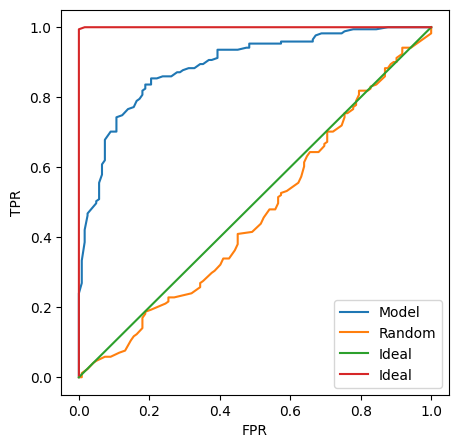

In [73]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores['fpr'], df_scores['tpr'], label='Model')
plt.plot(df_rand['fpr'], df_rand['tpr'], label='Random')
plt.plot([0,1], [0,1], label='Ideal')
plt.plot(df_ideal['fpr'], df_ideal['tpr'], label='Ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [74]:
from sklearn.metrics import roc_curve

In [75]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

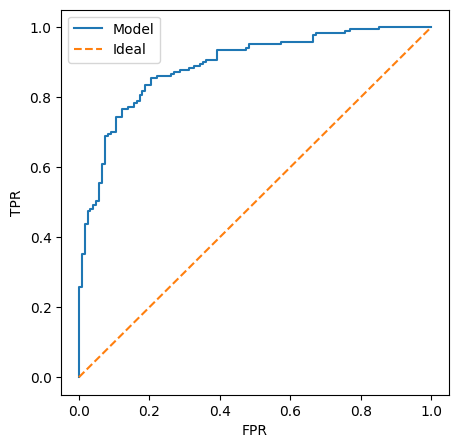

In [76]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Model')
plt.plot([0,1], [0,1], label='Ideal', linestyle='--')   
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

ROC AUC 

In [77]:
from sklearn.metrics import auc

In [78]:
auc(fpr, tpr)

0.8905186463426324

In [79]:
auc(df_scores.fpr, df_scores.tpr)

0.8904707122998754

In [80]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999520659572428

In [81]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8905186463426324

In [82]:
from sklearn.metrics import roc_auc_score

In [83]:
roc_auc_score(y_val, y_pred)

0.8905186463426324

In [84]:
neg = y_pred[y_val == 0]    
pos = y_pred[y_val == 1]

In [85]:
import random

In [86]:
#pos_ind = random.randint(0, len(pos) - 1)
#neg_ind = random.randint(0, len(neg) - 1)
#pos_ind, neg_ind


In [87]:
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)
    
    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.89018

In [88]:
nx = 50000
np.random.seed(1)
pos_indx = np.random.randint(0, len(pos), size=nx)
neg_indx = np.random.randint(0, len(neg), size=nx)
pos_indx, neg_indx

(array([ 37, 140,  72, ...,  32,  96,   6], dtype=int32),
 array([68, 64, 90, ..., 44, 83, 53], dtype=int32))

In [89]:
neg[neg_indx] > pos[pos_indx]

array([False, False,  True, ..., False, False, False])

In [90]:
(pos[pos_indx] > neg[neg_indx]).mean()

np.float64(0.89412)

K-FOLD CrossValidation

In [91]:
def train(df, y_train):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression()
    model.fit(X_train, y_train)

    return dv, model

In [92]:
dv, model = train(df_train, y_train)

C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred   

In [94]:
y_pred = predict(df_val, dv, model)

In [95]:
from sklearn.model_selection import KFold

In [96]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

train_idx, val_idx = next(kfold.split(df_full_train))

len(train_idx), len(val_idx), len(df_full_train)

(1052, 117, 1169)

In [97]:
df_full_train.iloc[train_idx]


,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
98,referral,NA,1,56659.0,employed,asia,4,0.75,1
1188,social_media,education,2,66171.0,unemployed,north_america,2,0.66,0
1407,events,finance,1,66523.0,self_employed,europe,3,0.64,1
1083,social_media,finance,1,56746.0,student,north_america,3,0.98,0
404,referral,NA,0,55449.0,student,australia,4,0.47,0
...,...,...,...,...,...,...,...,...,...
847,organic_search,healthcare,2,65227.0,NA,south_america,4,0.41,1
715,referral,NA,2,35103.0,unemployed,africa,0,0.88,0
905,social_media,other,1,66006.0,employed,south_america,5,0.64,1
1096,events,finance,2,73688.0,self_employed,asia,2,0.07,0


In [98]:
df_val = df_full_train.iloc[val_idx]

In [99]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [100]:
from tqdm.auto import tqdm

In [101]:
scoresauc = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    
    scoresauc.append(auc)

0it [00:00, ?it/s]

C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the numb

In [102]:
scoresauc

[0.9064171122994653,
 0.9023880597014926,
 0.9105939987752603,
 0.9403080872913993,
 0.8191425120772948,
 0.8790269559500329,
 0.9203703703703704,
 0.9252042740414834,
 0.8775510204081632,
 0.9317889317889317]

In [103]:
np.mean(scoresauc), np.std(scoresauc)

(np.float64(0.9012791322703894), np.float64(0.03363033941958391))

In [104]:
print('%.2f +/- %.2f' % (np.mean(scoresauc), np.std(scoresauc)))

0.90 +/- 0.03


4.7 Cross-Validation

In [105]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)

    return dv, model

In [106]:
dv, model = train(df_train, y_train, C=0.001)

In [107]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred   

In [108]:
y_pred = predict(df_val, dv, model)

In [109]:
n_splits = 5

for C in tqdm([0.001, 0.01, 1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scoresauc = []    

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        
        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)        
        scoresauc.append(auc)
        
    print('C=%s %.3f +/- %.3f' % (C, np.mean(scoresauc), np.std(scoresauc)))
        

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.868 +/- 0.019
C=0.01 0.894 +/- 0.021


C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the n

C=1 0.921 +/- 0.011


C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the n

C=0.5 0.920 +/- 0.013


C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the n

C=1 0.921 +/- 0.011


C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the n

C=5 0.920 +/- 0.011


C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the n

C=10 0.920 +/- 0.011


- C=0.001 0.868 +/- 0.019
- C=0.01 0.894 +/- 0.021
- C=1 0.921 +/- 0.011
- C=0.5 0.920 +/- 0.013
- C=5 0.920 +/- 0.011
- C=10 0.920 +/- 0.011

In [110]:
dv, model = train(df_full_train, df_full_train.converted.values, C=1.0)
y_pred = predict(df_test, dv, model)
        
auc = roc_auc_score(y_test, y_pred)   
auc

C:\Users\aYo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9233009708737864

In [111]:
scoresauc

[0.9213876274845529,
 0.9325983266869966,
 0.9063257486902807,
 0.9104140722291407,
 0.9308930506113605]

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- `interaction_count`
- `annual_income`

In [112]:
from sklearn.metrics import roc_auc_score

# compute ROC AUC for each numerical feature using the training set
for col in numerical:
	scores = df_train[col].values
	auc = roc_auc_score(y_train, scores)
	if auc < 0.5:
		auc = roc_auc_score(y_train, -scores)
		print(f"{col}: {auc:.3f} (inverted)")
	else:
		print(f"{col}: {auc:.3f}")

number_of_courses_viewed: 0.748
annual_income: 0.550
interaction_count: 0.718
lead_score: 0.617


Q1 - Response:
- `number_of_courses_viewed`

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.32
- 0.52
- 0.72
- 0.92

In [113]:
# prepare data as lists of dicts
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

# fit DictVectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

# train logistic regression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

# predict probabilities on validation set and compute AUC
y_val_pred = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_val_pred)

print('Validation AUC: {:.3f}'.format(auc))


Validation AUC: 0.903


### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* 0.545
* 0.745

In [114]:
# compute precision and recall for our model on the validation set
# Evaluate the model on thresholds from 0.00 to 1.00 with step 0.01,
# compute precision and recall for each threshold and plot them.

thresholds = np.arange(0.0, 1.0, 0.01)

precisions = []
recalls = []

for t in thresholds:
	y_pred = (y_val_pred >= t).astype(int)
	tp = int(((y_val == 1) & (y_pred >= t)).sum())
	fp = int(((y_val == 0) & (y_pred >= t)).sum())
	fn = int(((y_val == 1) & (y_pred < t)).sum())

	precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
	recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0

	precisions.append(precision)
	recalls.append(recall)

precisions = np.array(precisions)
recalls = np.array(recalls)

# find threshold where precision and recall are closest (intersection)
idx = np.argmin(np.abs(precisions - recalls))
threshold_intersect = thresholds[idx]

print(f"Threshold where precision and recall intersect (closest): {threshold_intersect:.3f}")
print(f"Precision at that threshold: {precisions[idx]:.3f}")
print(f"Recall at that threshold:    {recalls[idx]:.3f}")



Threshold where precision and recall intersect (closest): 0.980
Precision at that threshold: 0.000
Recall at that threshold:    0.000


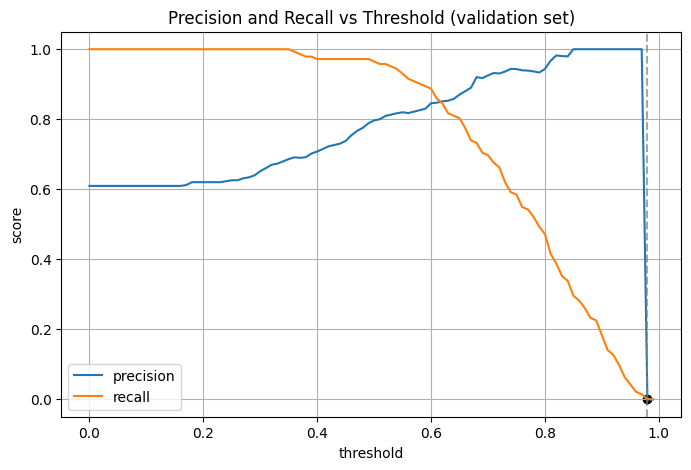

In [115]:
# plot
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions, label='precision')
plt.plot(thresholds, recalls, label='recall')
plt.axvline(threshold_intersect, color='gray', linestyle='--', alpha=0.7)
plt.scatter([threshold_intersect], [precisions[idx]], color='black')
plt.xlabel('threshold')
plt.ylabel('score')
plt.title('Precision and Recall vs Threshold (validation set)')
plt.legend()
plt.grid(True)
plt.show()

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw04
* If your answer doesn't match options exactly, select the closest one